# import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle


# Load The Dataset

In [2]:
# Load the historical dataset
data = pd.read_csv('supportTicketData.csv')  # Replace with the actual file path

# Display first few rows
print(data.head())

# Columns might include: ['Ticket_ID', 'Description', 'Priority']


   TicketID                        Ticket detailed description  \
0    123456  connection issues with assigned address hi fac...   
1    123457  cannot access hi cannot access fallowing link ...   
2    123458  re address shown valid dear colleagues remarke...   
3    123459  sent tuesday critical alert following alert oc...   
4    123460  code spelling mistake hello should discover fo...   

  urgency-Priority  
0               P1  
1               P2  
2               P1  
3               P2  
4               P2  


# Data _ Preprocessing

In [3]:
# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values if necessary
data['Ticket detailed description'] = data['Ticket detailed description'].fillna('')

# Clean the text data
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    text = text.lower()  # Convert to lowercase
    return text

data['Cleaned_Ticket detailed description'] = data['Ticket detailed description'].apply(clean_text)

# Verify the cleaned data
print(data['Cleaned_Ticket detailed description'].head())


TicketID                       0
Ticket detailed description    0
urgency-Priority               0
dtype: int64
0    connection issues with assigned address hi fac...
1    cannot access hi cannot access fallowing link ...
2    re address shown valid dear colleagues remarke...
3    sent tuesday critical alert following alert oc...
4    code spelling mistake hello should discover fo...
Name: Cleaned_Ticket detailed description, dtype: object


# Featuring Engineering 

In [4]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Convert text into numerical representations using TF-IDF
# Assuming 'Cleaned_Ticket detailed description' is your cleaned text column
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X = tfidf.fit_transform(data['Cleaned_Ticket detailed description']).toarray()

# Save the vectorizer for deployment
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Step 2: Encode the target variable
# Mapping priorities (e.g., P1, P2, etc.) to numerical codes
priority_mapping = {'P1': 0, 'P2': 1, 'P3': 2, 'P4': 3}  # Map priorities to numbers

# Fix column name references
data['urgency-Priority_Code'] = data['urgency-Priority'].map(priority_mapping)

# Extract the target variable
y = data['urgency-Priority_Code']


#  Split Data for Training and Testing

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training Data: {X_train.shape}, Testing Data: {X_test.shape}')


Training Data: (15836, 5000), Testing Data: (3960, 5000)


# Train the Model

In [6]:
# Use a Random Forest Classifier for simplicity
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model
with open('ticket_priority_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [10]:
print("Unique classes in y_test:", set(y_test))
print("Unique classes in y_pred:", set(y_pred))

Unique classes in y_test: {0, 1, 2}
Unique classes in y_pred: {np.int64(0), np.int64(1), np.int64(2)}


In [9]:
from sklearn.metrics import classification_report

# Define the labels explicitly to include all expected classes
labels = [0, 1, 2, 3]  # Corresponding to priority_mapping values

# Generate the classification report
report = classification_report(
    y_test, y_pred, labels=labels, target_names=list(priority_mapping.keys()), zero_division=0
)

# Print the report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

          P1       0.63      0.82      0.71      1350
          P2       0.65      0.39      0.48      1097
          P3       0.97      1.00      0.99      1513
          P4       0.00      0.00      0.00         0

    accuracy                           0.77      3960
   macro avg       0.56      0.55      0.55      3960
weighted avg       0.77      0.77      0.75      3960



# Evaluate the model

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7674242424242425


# Deployment

In [11]:
# Load the vectorizer and model
with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)

with open('ticket_priority_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Predict for new data
new_ticket = ["The application is down, unable to access!"]
new_ticket_cleaned = [clean_text(ticket) for ticket in new_ticket]
new_ticket_vectorized = tfidf.transform(new_ticket_cleaned).toarray()

predicted_priority = model.predict(new_ticket_vectorized)
print("Predicted Priority:", list(priority_mapping.keys())[predicted_priority[0]])


Predicted Priority: P1


In [12]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [13]:
from wordcloud import WordCloud
print("WordCloud installed successfully!")


WordCloud installed successfully!


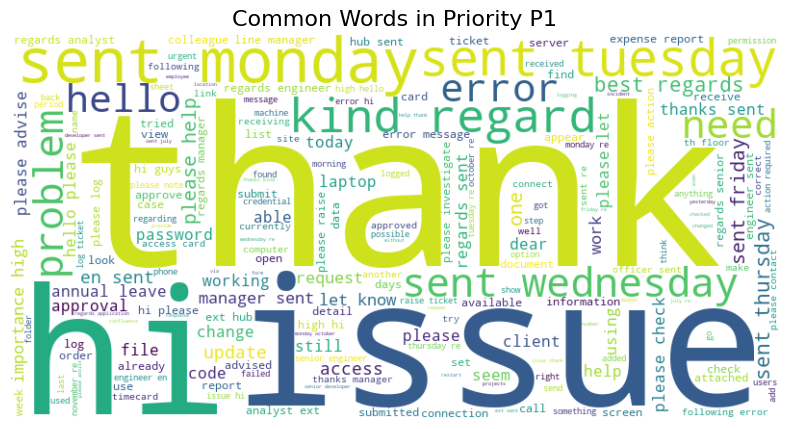

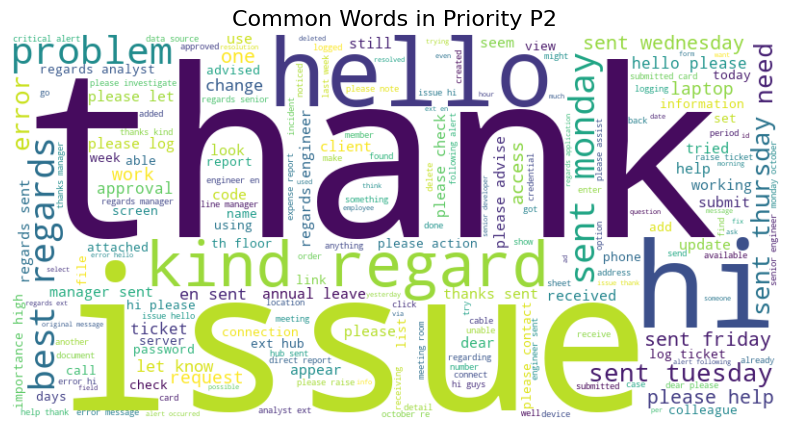

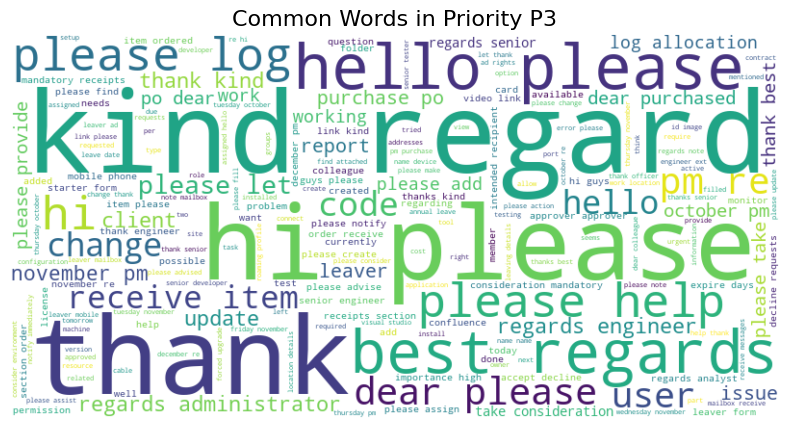

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display a word cloud
def plot_word_cloud(text, urgency_priority_level):
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Common Words in Priority {urgency_priority_level}', fontsize=16)
    plt.show()

# Generate word clouds for each priority level
for priority, group in data.groupby('urgency-Priority'):
    # Combine all cleaned ticket descriptions into one text
    text = " ".join(group['Cleaned_Ticket detailed description'])
    
    # Call the word cloud plotting function
    plot_word_cloud(text, priority)


In [15]:
import pickle

# Correctly load the pickle file
file_path = r"C:/Users/asus/Desktop/SupportTicket Model/ticket_priority_model.pkl"

try:
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
        print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading the model: {e}")


Model loaded successfully!


In [16]:
file_path = r"C:/Users/asus/Desktop/SupportTicket Model/ticket_priority_model.pkl"

try:
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
        print(content)
except UnicodeDecodeError:
    print("This is a binary file, not a text file.")


This is a binary file, not a text file.


In [17]:
from flask import Flask, request, jsonify
import pickle

# Load the trained model
model_path = "ticket_priority_model.pkl"
with open(model_path, 'rb') as file:
    model = pickle.load(file)

app = Flask(__name__)

@app.route('/')
def home():
    return "Support Ticket Priority Prediction API"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json  # Input JSON data
    if not data or 'ticket_text' not in data:
        return jsonify({'error': 'Invalid input! Provide ticket_text.'}), 400

    ticket_text = data['ticket_text']
    # Assuming your model accepts text and transforms it appropriately
    prediction = model.predict([ticket_text])[0]

    return jsonify({'priority': prediction})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [21]:
pip install streamlit


In [22]:
import streamlit as st
import numpy as np
import pandas as pd

st.title('Support Ticket Priority Prediction')

ticket_text = st.text_area("Enter Ticket Description:")

if ticket_text:
    # Simulate a prediction (replace with actual model)
    priority = np.random.choice(["P1", "P2", "P3"])
    st.write(f"Predicted Priority: {priority}")


2025-01-24 16:59:40.761 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-24 16:59:41.045 
  command:

    streamlit run C:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-24 16:59:41.048 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-24 16:59:41.052 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-24 16:59:41.054 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-24 16:59:41.056 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-24 16:59:41.061 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-24 16:59:4